In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv(r"C:\Users\HP\Documents\DS\Sparks\Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.drop(['Id'],axis=1,inplace=True)

In [4]:
data.info()
data.isnull().sum()
data.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
data['Species'].value_counts()

1    50
2    49
0    48
Name: Species, dtype: int64

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
data.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
data.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
data.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
data.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()

KeyError: 'age'

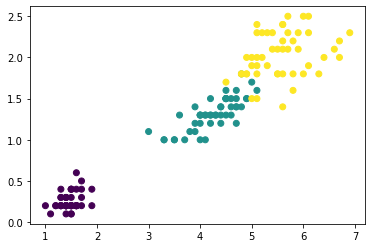

In [9]:
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],c=data.Species.values)

<AxesSubplot:>

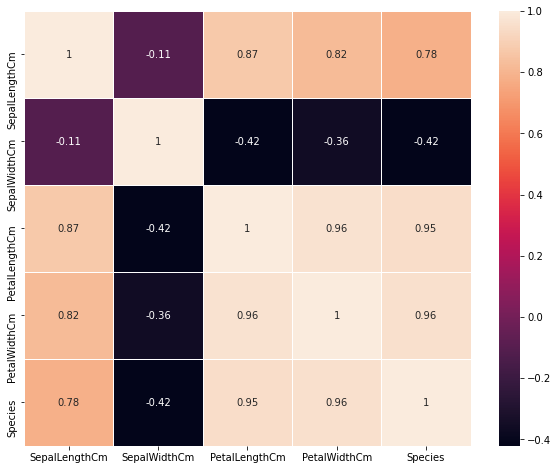

In [11]:
data.corr()
fig=plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),linewidths=1,annot=True)


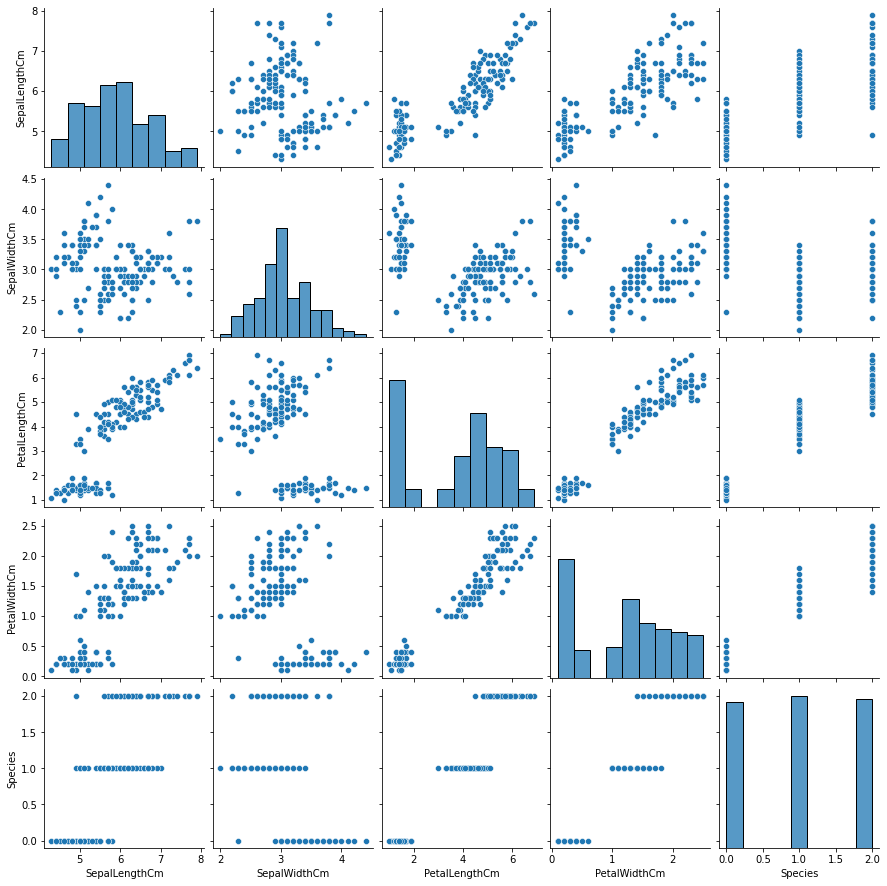

In [12]:
sns.pairplot(data)

In [13]:
x =data.iloc[:,[0,1,2,3]].values

In [14]:
#K - MEANS CLASSIFICATION
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    wcss


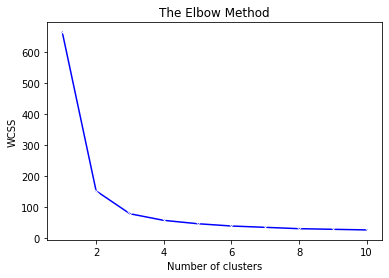

In [15]:
import warnings
warnings.filterwarnings("ignore")
sns.lineplot(range(1, 11), wcss,marker='x',color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
#KMEANS CLASSIFIER

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(x)


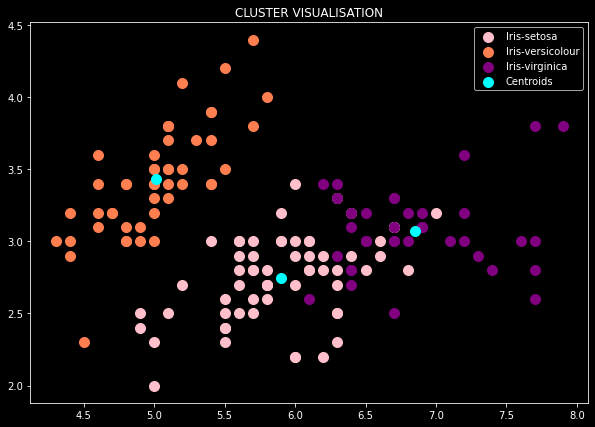

In [17]:
# Visualising the clusters 

plt.style.use("dark_background")
fig = plt.figure(figsize=(10, 7))
plt.title("CLUSTER VISUALISATION")
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'coral', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'purple', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'cyan', label = 'Centroids')
plt.legend()